# Leaf Classification (IFT712 : Projet de session)

Josselin DUBOIS - Antoine GUENARD - Yann JOURDIN

---

### Mise en place de l'environnement

(Testé avec Python 3.9.7)

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep")
%matplotlib inline

from data_management import DataManager

from classification.hyperparameters.classifier_hyperparameters import ClassifierHyperParameters
from classification.hyperparameters.hyperparameter import HyperParameter

from classification.classifiers.knn import KNN
from classification.classifiers.multi_layer import MultiLayerPerceptron
from classification.classifiers.random_forest import RandomForest
from classification.classifiers.svm import SVM
from classification.classifiers.gaussian_naive_bayes import GaussianNB
from classification.classifiers.gaussian_process import GaussianProcess

import warnings
warnings.filterwarnings('ignore')

### Gestion des données

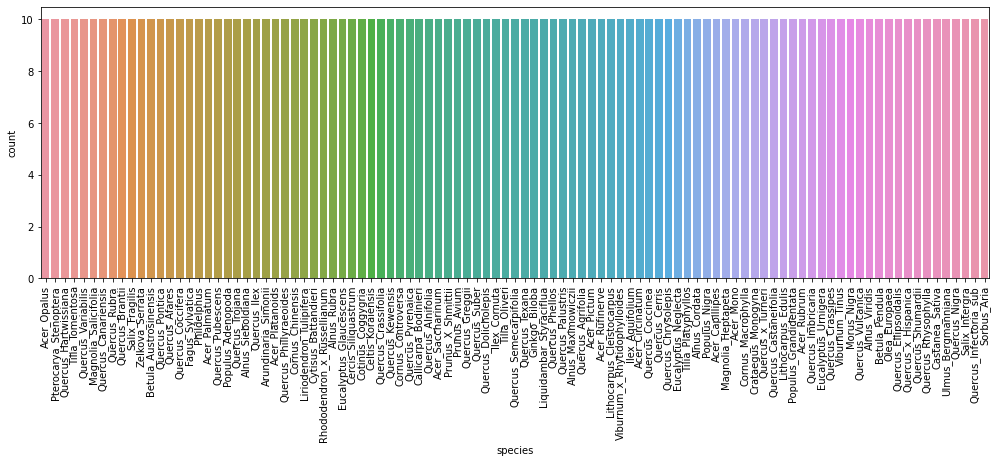

990
594


In [60]:
dm = DataManager()

fig = plt.figure(figsize=(17, 5))
ax = sns.countplot(
    x="species",
    data=dm.train_data
)
plt.xticks(rotation=90)
plt.show()

print(len(dm.train_data))
print(len(dm.test_data))



dm.make_validation_set()

### Méthode des K Plus Proches Voisins

In [11]:
knn_clf = KNN()

knn_clf.train(dm.x_train, dm.y_train)
knn_score = knn_clf.score(dm.x_valid, dm.y_valid)

print(knn_clf)

### K-Nearest-Neighbors
 algorithm: auto
 leaf_size: 30
 metric: minkowski
 metric_params: None
 n_jobs: None
 *n_neighbors: 5
 p: 2
 weights: uniform



Recherche d'hyperparamètres

In [12]:
knn_params = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': ((10, 100), 10),
    'n_neighbors': ((1, 15), 1),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

knn_hyperparameters = ClassifierHyperParameters(knn_params)
knn_clf.hyperparameters = knn_hyperparameters

knn_search_score = knn_clf.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
knn_best_score = knn_clf.score(dm.x_valid, dm.y_valid, best=True)

Researching the best hyperparameters over 1512 combinations.
Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


Scores

In [229]:
print(f"Base score : {knn_score}")
print(f"Training score after hp search: {knn_search_score}")
print(f"Validation score after hp search: {knn_best_score}")

print(knn_clf.best_parameters)

Base score : 0.8232323232323232
Training score after hp search: 0.9545657192898653
Validation score after hp search: 0.9242424242424242
{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


### Méthode du Perpeptron Multi-Couches

In [14]:
mlp_clf = MultiLayerPerceptron()

mlp_clf.train(dm.x_train, dm.y_train)
mlp_score = mlp_clf.score(dm.x_valid, dm.y_valid)

print(mlp_clf)

### MultiLayer Perceptron
 activation: relu
 alpha: 0.0001
 batch_size: auto
 beta_1: 0.9
 beta_2: 0.999
 early_stopping: False
 epsilon: 1e-08
 hidden_layer_sizes: (100,)
 learning_rate: constant
 learning_rate_init: 0.001
 max_fun: 15000
 max_iter: 200
 momentum: 0.9
 n_iter_no_change: 10
 nesterovs_momentum: True
 power_t: 0.5
 random_state: None
 shuffle: True
 solver: adam
 tol: 0.0001
 validation_fraction: 0.1
 verbose: False
 warm_start: False



Recherche d'hyperparamètres

In [15]:
mlp_params = {
    'hidden_layer_sizes': [(100,), (50,), (10, 10), (25, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # sgd
    'momentum': ((0, 1), 10),  # sgd
    'beta_1': ((0.5, 0.999), 10),  # adam
    'beta_2': ((0.5, 0.999), 10) # adam
}

mlp_params_lbfgs = {
    'hidden_layer_sizes': [(100,), (50,), (10, 10), (25, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs'],
    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}

mlp_params_sgd = {
    'hidden_layer_sizes': [(100,), (50,), (10, 10), (25, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'momentum': ((0, 1), 10),
}

mlp_params_adam = {
    'hidden_layer_sizes': [(100,), (50,), (10, 10), (25, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'beta_1': ((0.5, 0.999), 10),
    'beta_2': ((0.5, 0.999), 10)
}

mlp_hyperparameters_lbfgs = ClassifierHyperParameters(mlp_params_lbfgs)
mlp_hyperparameters_sgd = ClassifierHyperParameters(mlp_params_sgd)
mlp_hyperparameters_adam = ClassifierHyperParameters(mlp_params_adam)

mlp_clf_lbfgs = MultiLayerPerceptron()
mlp_clf_lbfgs.train(dm.x_train, dm.y_train)
mlp_clf_lbfgs.hyperparameters = mlp_hyperparameters_lbfgs

mlp_clf_sgd = MultiLayerPerceptron()
mlp_clf_sgd.train(dm.x_train, dm.y_train)
mlp_clf_sgd.hyperparameters = mlp_hyperparameters_sgd

mlp_clf_adam = MultiLayerPerceptron()
mlp_clf_adam.train(dm.x_train, dm.y_train)
mlp_clf_adam.hyperparameters = mlp_hyperparameters_adam

mlp_lbfgs_score = mlp_clf_lbfgs.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
mlp_sgd_score = mlp_clf_sgd.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
mlp_adam_score = mlp_clf_adam.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)

if mlp_lbfgs_score >= max(mlp_sgd_score, mlp_adam_score):
    mlp_search_score = mlp_lbfgs_score
    mlp_clf = mlp_clf_lbfgs
elif mlp_sgd_score >= max(mlp_lbfgs_score, mlp_adam_score):
    mlp_search_score = mlp_sgd_score
    mlp_clf = mlp_clf_sgd
else:
    mlp_search_score = mlp_adam_score
    mlp_clf = mlp_clf_adam

mlp_best_score = mlp_clf.score(dm.x_valid, dm.y_valid, best=True)

Researching the best hyperparameters over 96 combinations.
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Researching the best hyperparameters over 48 combinations.
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Researching the best hyperparameters over 16 combinations.
Fitting 5 folds for each of 16 candidates, totalling 80 fits


Score

In [230]:
print(f"Base score : {mlp_score}")
print(f"Training score after hp search: {mlp_search_score}")
print(f"Validation score after hp search: {mlp_best_score}")

print(mlp_clf.best_parameters)

Base score : 0.8181818181818182
Training score after hp search: 0.9470026271793646
Validation score after hp search: 0.9393939393939394
{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}


### Méthode des forêts aléatoires

In [17]:
rdf_clf = RandomForest()

rdf_clf.train(dm.x_train, dm.y_train)
rdf_score = rdf_clf.score(dm.x_valid, dm.y_valid)

print(rdf_clf)

### Random Forest
 bootstrap: True
 ccp_alpha: 0.0
 class_weight: None
 criterion: gini
 max_depth: None
 max_features: auto
 max_leaf_nodes: None
 max_samples: None
 min_impurity_decrease: 0.0
 min_samples_leaf: 1
 min_samples_split: 2
 min_weight_fraction_leaf: 0.0
 n_estimators: 100
 n_jobs: None
 oob_score: False
 random_state: None
 verbose: 0
 warm_start: False



Recherche d'hyperparamètres

In [18]:
rdf_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'warm_start': [True, False],
    'class_weight': ['balanced', 'baanced_subsample']
}

rdf_hyperparameters = ClassifierHyperParameters(rdf_params)
rdf_clf.hyperparameters = rdf_hyperparameters

rdf_search_score = rdf_clf.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
rdf_best_score = rdf_clf.score(dm.x_valid, dm.y_valid, best=True)

Researching the best hyperparameters over 72 combinations.
Fitting 5 folds for each of 72 candidates, totalling 360 fits


Score

In [231]:
print(f"Base score : {rdf_score}")
print(f"Training score after hp search: {rdf_search_score}")
print(f"Validation score after hp search: {rdf_best_score}")

print(rdf_clf.best_parameters)

Base score : 0.9696969696969697
Training score after hp search: 0.970949765146087
Validation score after hp search: 0.9595959595959596
{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100, 'warm_start': False}


### Méthode des machines à vecteurs de support

In [20]:
svm_clf = SVM()

svm_clf.train(dm.x_train, dm.y_train)
svm_score = svm_clf.score(dm.x_valid, dm.y_valid)

print(svm_clf)

### Support Vector Machine
 C: 1.0
 break_ties: False
 cache_size: 200
 class_weight: None
 coef0: 0.0
 decision_function_shape: ovr
 degree: 3
 gamma: scale
 kernel: rbf
 max_iter: -1
 probability: False
 random_state: None
 shrinking: True
 tol: 0.001
 verbose: False



Recherche d'hyperparamètres

In [21]:
svm_params = {
    'C': [0.1, 0.5, 1.0, 2.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': ((3, 15), 2),
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}


svm_hyperparameters = ClassifierHyperParameters(svm_params)
svm_clf.hyperparameters = svm_hyperparameters

svm_search_score = svm_clf.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
svm_best_score = svm_clf.score(dm.x_valid, dm.y_valid, best=True)

Researching the best hyperparameters over 768 combinations.
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


Score

In [232]:
print(f"Base score : {svm_score}")
print(f"Training score after hp search: {svm_search_score}")
print(f"Validation score after hp search: {svm_best_score}")

print(svm_clf.best_parameters)

Base score : 0.8535353535353535
Training score after hp search: 0.9141708462702013
Validation score after hp search: 0.8888888888888888
{'C': 2.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


### Classification naïve Bayésienne

In [184]:
gnb_clf = GaussianNB()

gnb_clf.train(dm.x_train, dm.y_train)
gnb_train_score = gnb_clf.score(dm.x_train, dm.y_train)
gnb_valid_score = gnb_clf.score(dm.x_valid, dm.y_valid)

print(gnb_clf)

### Gaussian Naive Bayes
 priors: None
 var_smoothing: 1e-09



Recherche d'hyperparamètres

In [ ]:
gnb_params = {
    'C': [0.1, 0.5, 1.0, 2.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': ((3, 15), 2),
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}


gnb_hyperparameters = ClassifierHyperParameters(gnb_params)
gnb_clf.hyperparameters = gnb_hyperparameters

gnb_search_score = gnb_clf.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
gnb_best_score = gnb_clf.score(dm.x_valid, dm.y_valid, best=True)

Score

In [186]:
print(f"Train score : {gnb_train_score}")
print(f"Validation score : {gnb_valid_score}")

Train score : 1.0
Validation score : 0.48484848484848486


### Classification par processus gaussiens

Recherche d'hyperparamètres

In [26]:
gpc_params = {
    'warm_start': [True, False],
    'multi_class': ['one_vs_rest', 'one_vs_one']
}


gpc_hyperparameters = ClassifierHyperParameters(gpc_params)
gpc_clf.hyperparameters = gpc_hyperparameters

gpc_search_score = gpc_clf.hyperparameter_search(dm.x_train, dm.y_train, verbose=1)
gpc_best_score = gpc_clf.score(dm.x_valid, dm.y_valid, best=True)

Researching the best hyperparameters over 4 combinations.
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Score

In [233]:
print(f"Base score : {gpc_score}")
print(f"Training score after hp search: {gpc_search_score}")
print(f"Validation score after hp search: {gpc_best_score}")

print(gpc_clf.best_parameters)

Base score : 0.17676767676767677
Training score after hp search: 0.3686649152137569
Validation score after hp search: 0.17676767676767677
{'multi_class': 'one_vs_rest', 'warm_start': True}


### Visualisation des résultats

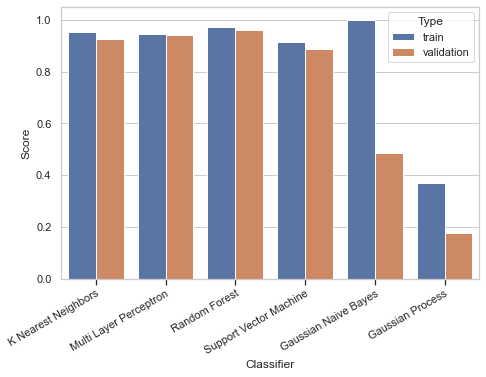

In [228]:
df_results = pd.DataFrame(data = 
    {
        'Classifier': [
            'K Nearest Neighbors', 'Multi Layer Perceptron',
            'Random Forest', 'Support Vector Machine',
            'Gaussian Naive Bayes', 'Gaussian Process',

            'K Nearest Neighbors', 'Multi Layer Perceptron',
            'Random Forest', 'Support Vector Machine',
            'Gaussian Naive Bayes', 'Gaussian Process'
        ],
        'Score': [
            knn_search_score, mlp_search_score,
            rdf_search_score, svm_search_score,
            gnb_train_score, gpc_search_score,

            knn_best_score, mlp_best_score,
            rdf_best_score, svm_best_score,
            gnb_valid_score, gpc_best_score
        ],
        'Type': [
            'train', 'train', 'train',
            'train', 'train', 'train',

            'validation', 'validation', 'validation',
            'validation', 'validation', 'validation'
        ]
    }
)

plt.figure(figsize=(7.5, 5))
ax = sns.barplot(x="Classifier", y="Score", hue="Type", data=df_results) 

plt.xticks(rotation=30, ha='right', rotation_mode='anchor')
plt.tick_params(bottom=True)